In [1]:
import numpy as np
from graphviz import Digraph

In [2]:
class MST:
    
    def __init__(self, data):
        
        self.data = data
        self.unvisited = list(range(1, len(data)))
        self.visited = [0]
        self.mstEdges = []
        
    def execute(self):
        
        while len(self.unvisited) != 0:
            
            minEdge = ((0, 0), float("inf"))
            
            for nodeV in self.visited:
                for nodeU in self.unvisited:
                    edge = self.data[nodeV, nodeU]
                    if edge != 0 and edge < minEdge[1]:
                        minEdge = ((nodeV, nodeU), edge)
                        
            self.mstEdges.append(minEdge)
            self.visited.append(minEdge[0][1])
            self.unvisited.remove(minEdge[0][1])

        l = 0
        graph = Digraph()
        msTree = np.zeros(np.shape(self.data))
        for edge in self.mstEdges:
            msTree[edge[0]] = edge[1]
            msTree[edge[0][::-1]] = edge[1]
            graph.edge(f"{edge[0][0]}", f"{edge[0][1]}", f"{edge[1]}", dir="none")
            l += edge[1]
        return {"tree": msTree, "graph": graph, "length": l}
    

In [3]:
data = np.array([
    [0, 2, 6, 8, 0, 0, 3, 0, 0, 0],
    [2, 0, 9, 3, 0, 4, 9, 0, 0, 0],
    [6, 9, 0, 7, 0, 0, 0, 0, 0, 0],
    [8, 3, 7, 0, 5, 5, 0, 0, 0, 6],
    [0, 0, 0, 5, 0, 0, 8, 9, 0, 0],
    [0, 4, 0, 5, 0, 0, 0, 6, 4, 0],
    [3, 9, 0, 0, 8, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 9, 6, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 4, 0, 1, 0, 2],
    [0, 0, 0, 6, 0, 0, 0, 0, 2, 0]
])
data

array([[0, 2, 6, 8, 0, 0, 3, 0, 0, 0],
       [2, 0, 9, 3, 0, 4, 9, 0, 0, 0],
       [6, 9, 0, 7, 0, 0, 0, 0, 0, 0],
       [8, 3, 7, 0, 5, 5, 0, 0, 0, 6],
       [0, 0, 0, 5, 0, 0, 8, 9, 0, 0],
       [0, 4, 0, 5, 0, 0, 0, 6, 4, 0],
       [3, 9, 0, 0, 8, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 9, 6, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 4, 0, 1, 0, 2],
       [0, 0, 0, 6, 0, 0, 0, 0, 2, 0]])

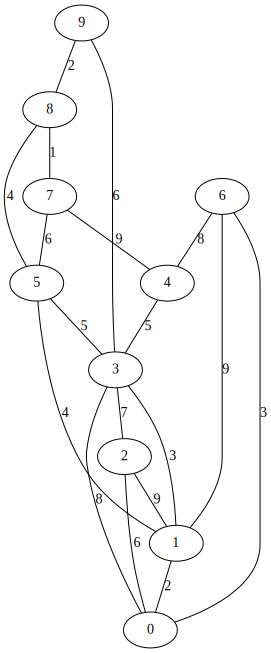

In [4]:
g = Digraph()
for i in range(len(data)):
    for j in range(len(data)):
        if (data[i, j]) != 0 and i > j:
            g.edge(f"{i}", f"{j}", f"{data[i, j]}", dir="none")
g

[[0. 2. 6. 0. 0. 0. 3. 0. 0. 0.]
 [2. 0. 0. 3. 0. 4. 0. 0. 0. 0.]
 [6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0. 4. 0.]
 [3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 4. 0. 1. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]] 

Length: 30


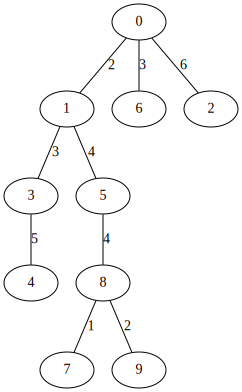

In [5]:
mst = MST(data)
res = mst.execute()
print(res["tree"], "\n\nLength:", res["length"])
res["graph"]